# Learning OpenCV

## Basic Grayscale

### Importing libraries

In [12]:
%pylab inline 
import cv2
import numpy as np
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


### Initialize the camera resource

In [13]:
cam = cv2.VideoCapture(0)

### Real-Time Camera

Stream stopped


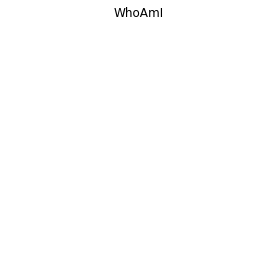

In [16]:
try:
    while True:
        ret, frame = cam.read()
        if not ret:
            # Release the Video Device if ret is false
            cam.release()
            # Message to be displayed after releasing the device
            print("Released Camera Resource")
            break
            
        axis('off')
        title("WhoAmI")
         
#         # Original Frame
#         original_cv2_frame = frame
#         original_cv2_frame = cv2.cvtColor(original_cv2_frame, cv2.COLOR_BGR2RGB)
#         imshow(original_cv2_frame)
#         show()
        
#         # Gray Frame
#         gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         gray_frame = cv2.cvtColor(gray_frame, cv2.COLOR_BGR2GRAY)
#         imshow(gray_frame)
#         show()
        
        # Natural Frame
        #flip image for natural viewing
        natural_frame = cv2.flip(frame, 1)
        natural_frame = cv2.cvtColor(natural_frame, cv2.COLOR_BGR2RGB)

        imshow(natural_frame)
        show()
        
        # Display the frame until new frame is available
        clear_output(wait=True)
        
        # Quit the camera if run using terminal
        if cv2.waitKey(20) & 0xFF == ord('q'):
            break
        
except KeyboardInterrupt:
    cam.release()
    print("Stream stopped")



### Adjust Resolution

In [14]:
def change_res(width, height):
    cam.set(3, width)
    cam.set(4, height)
    
def make_1080p():
    cam.set(3, 1920)
    cam.set(4, 1080)

def make_720p():
    cam.set(3, 1280)
    cam.set(4, 720)

def make_480p():
    cam.set(3, 640)
    cam.set(4, 480)

In [18]:
# Testing
make_1080p()